# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=500, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?



**transforms.ToTensor(): The ToTensor() transformation converts the input image from a NumPy array format to a PyTorch tensor format. This is essential because PyTorch's primary data structure for working with tensors is its torch.Tensor. By converting the images to tensors, we enable PyTorch to leverage its optimized tensor operations, enabling efficient computation and taking advantage of GPU acceleration for faster training. Tensors are the fundamental building blocks of PyTorch, allowing seamless integration with other PyTorch modules, layers, and loss functions.**


**transforms.Normalize((0.5,), (0.5,)): the mean and standard deviation for the single channel (grayscale) are both set to 0.5. The reason for choosing these specific values (mean = 0.5, std = 0.5) is to scale the pixel values to a range of [-1, 1]. The original pixel values in the MNIST dataset range from 0 to 255, so after normalization, they will be in the range of approximately [-1, 1], centered around 0.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


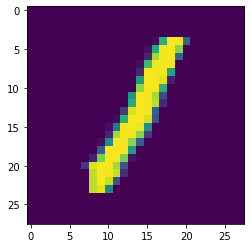

4


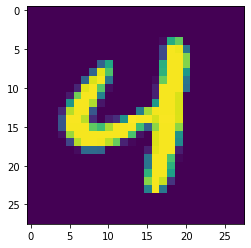

0


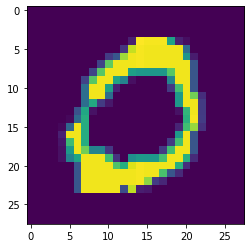

4


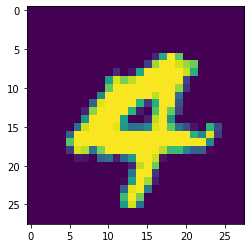

6


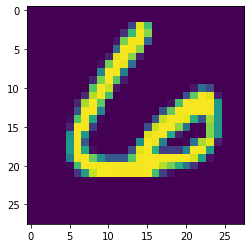

In [13]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
# Defining the class for your neural network
class MultiLayerPerceptron(nn.Module):
    def __init__(self, layers=[120,84]):
        super().__init__()
        self.linear1 = nn.Linear(784,layers[0])
        self.linear2 = nn.Linear(layers[0],layers[1])
        self.linear3 = nn.Linear(layers[1],10)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)
    
#Instantiating the model
mlp = MultiLayerPerceptron()
mlp.to(device)

for images, labels in train_loader:
    print("Initial Batch Shape: ", images.size())
    break
print("Batch Shape after Flattening: ", images.view(100,-1).size())

Initial Batch Shape:  torch.Size([100, 1, 28, 28])
Batch Shape after Flattening:  torch.Size([100, 784])


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# Choosing the Model  
clf = MultiLayerPerceptron()

#Selecting an Adam optimizer
optimizer = optim.Adam(clf.parameters(), lr=0.001) #Learning rate set to 0.001

# Choosing the crossEntropy loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
train_losses = list()
train_correct = []
epochs = 10
test_losses = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #Running the training batches
    for b, (inputs, labels) in enumerate(train_loader):
        b+=1
        
        #Applying the model
        labels_pred = clf(inputs.view(100, -1)) # flattens training inputs
        loss = criterion(labels_pred, labels)
        
        #Calculating the number of correct predictions
        predicted = torch.max(labels_pred.data, 1)[1] # maximum probability prediction
        batch_corr = (predicted == labels).sum()
        trn_corr += batch_corr
        
        #Updating param
        optimizer.zero_grad() #resets the gradients after each training step
        loss.backward() #initializes backpropagation
        optimizer.step() #per form param update
        
        #Printing interim results
        if b%600 == 0:
            print(f'Epoch: {i:2} Batch: {b:4} [{100*b:6}/60000] Train loss: {loss.item():10.8f} Train accuracy:{trn_corr.item()/len(train_loader):.3f}%')

    #Updating train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
                  
    #Running testing batches:
    with torch.no_grad(): #eliminates gradient calculation during testing
        for b, (test_inputs, test_labels) in enumerate(test_loader):
            labels_val = clf(test_inputs.view(500,-1))
                  
            #Evaluating the number of correct pradictions
            predicted = torch.max(labels_val.data, 1)[1]
            tst_corr += (predicted == test_labels).sum()
            
    #Updating test loss & accuracy for the epoch
    loss = criterion(labels_val, test_labels)
    test_losses.append(loss)
    test_correct.append(tst_corr)

Epoch:  0 Batch:  600 [ 60000/60000] Train loss: 0.24202274 Train accuracy:87.603%
Epoch:  1 Batch:  600 [ 60000/60000] Train loss: 0.16019611 Train accuracy:94.093%
Epoch:  2 Batch:  600 [ 60000/60000] Train loss: 0.20297064 Train accuracy:95.657%
Epoch:  3 Batch:  600 [ 60000/60000] Train loss: 0.02806288 Train accuracy:96.448%
Epoch:  4 Batch:  600 [ 60000/60000] Train loss: 0.13480368 Train accuracy:97.118%
Epoch:  5 Batch:  600 [ 60000/60000] Train loss: 0.06906697 Train accuracy:97.358%
Epoch:  6 Batch:  600 [ 60000/60000] Train loss: 0.17565243 Train accuracy:97.672%
Epoch:  7 Batch:  600 [ 60000/60000] Train loss: 0.02919478 Train accuracy:97.863%
Epoch:  8 Batch:  600 [ 60000/60000] Train loss: 0.02434774 Train accuracy:98.153%
Epoch:  9 Batch:  600 [ 60000/60000] Train loss: 0.05361896 Train accuracy:98.235%


Plot the training loss (and validation loss/accuracy, if recorded).

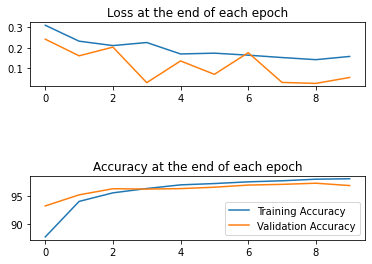

In [9]:
trn_loss = [trn.item() for trn in train_losses]

plt.subplot(3,1,1)
plt.plot(test_losses, label="Validation Loss")
plt.plot(trn_loss, label="Training Loss")
plt.title("Loss at the end of each epoch")

plt.subplot(3,1,3)
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")

plt.legend()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
print(f'Test Accuracy: {test_correct[-1].item()*100/10000:.3f}%')

Test Accuracy: 96.990%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
train_losses = []
train_correct = []
test_losses = []
test_correct = []
epochs = 10

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #Running the training batches
    for b, (inputs, labels) in enumerate(train_loader):
        b+=1
        
        #Applying the model
        labels_pred = clf(inputs.view(100, -1)) # flattens training inputs
        loss = criterion(labels_pred, labels)
        
        #Calculating the number of correct predictions
        predicted = torch.max(labels_pred.data, 1)[1] # maximum probability prediction
        batch_corr = (predicted == labels).sum()
        trn_corr += batch_corr
        
        #Updating param
        optimizer.zero_grad() # gradient reset
        loss.backward() # backpropagation
        optimizer.step() #per form parameter update
        
        #Printing interim results
        if b%600 == 0:
            print(f'Epoch: {i:2} Batch: {b:4} [{100*b:6}/60000] Train loss: {loss.item():10.8f} Train accuracy:{trn_corr.item()/len(train_loader):.3f}%')

    #Updating train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
            
        
    #Running the testing batches:
    with torch.no_grad(): #removes gradients
        for b, (test_inputs, test_labels) in enumerate(test_loader):
            labels_val = clf(test_inputs.view(500,-1))
                  
            #evaluating number of correct pradictions
            predicted = torch.max(labels_val.data, 1)[1]
            tst_corr += (predicted == test_labels).sum()
            
    #Update test loss & accuracy for the epoch
    loss = criterion(labels_val, test_labels)
    test_losses.append(loss)
    test_correct.append(tst_corr)

Epoch:  0 Batch:  600 [ 60000/60000] Train loss: 0.03998091 Train accuracy:98.453%
Epoch:  1 Batch:  600 [ 60000/60000] Train loss: 0.06058427 Train accuracy:98.562%
Epoch:  2 Batch:  600 [ 60000/60000] Train loss: 0.02704915 Train accuracy:98.700%
Epoch:  3 Batch:  600 [ 60000/60000] Train loss: 0.03939768 Train accuracy:98.727%
Epoch:  4 Batch:  600 [ 60000/60000] Train loss: 0.00630848 Train accuracy:98.852%
Epoch:  5 Batch:  600 [ 60000/60000] Train loss: 0.00500408 Train accuracy:98.888%
Epoch:  6 Batch:  600 [ 60000/60000] Train loss: 0.06675144 Train accuracy:98.953%
Epoch:  7 Batch:  600 [ 60000/60000] Train loss: 0.05102309 Train accuracy:99.097%
Epoch:  8 Batch:  600 [ 60000/60000] Train loss: 0.02950390 Train accuracy:99.128%
Epoch:  9 Batch:  600 [ 60000/60000] Train loss: 0.00666141 Train accuracy:99.157%


## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
torch.save(clf.state_dict(), 'HandwrittenClassifier.pt')